Instalando as bibliotecas:

In [59]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install Seaborn


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv("..\Analise\Base de Dados .xlsx - Implantações.csv")
print(dataframe)
dataframe.head()

    DATA PEDIDO DATA ENTREGA                PRODUTO      MEIO  FALHAS  \
0      1/9/2004     5/1/2005         CONTAS A PAGAR      CNAB      11   
1      1/9/2004   27/10/2004         CONTAS A PAGAR  INTERNET       8   
2      9/9/2004    28/9/2004  COBRANÇA COM REGISTRO      CNAB       5   
3     10/9/2004     2/1/2005  COBRANÇA COM REGISTRO      CNAB      16   
4     13/9/2004    5/10/2004         CONTAS A PAGAR  INTERNET       5   
..          ...          ...                    ...       ...     ...   
845   31/5/2005    18/6/2005  COBRANÇA SEM REGISTRO  INTERNET       4   
846   31/5/2005    24/7/2005  COBRANÇA COM REGISTRO      CNAB       8   
847   31/5/2005    23/7/2005  COBRANÇA COM REGISTRO      CNAB       6   
848   31/5/2005    12/7/2005  COBRANÇA COM REGISTRO      CNAB       5   
849   31/5/2005    11/7/2005         CONTAS A PAGAR  INTERNET       5   

       STATUS                     MOTIVO  Prazo  
0    Desistiu          NÃO CUMPRIU PRAZO    126  
1    Desistiu          

,DATA PEDIDO,DATA ENTREGA,PRODUTO,MEIO,FALHAS,STATUS,MOTIVO,Prazo
0,1/9/2004,5/1/2005,CONTAS A PAGAR,CNAB,11,Desistiu,NÃO CUMPRIU PRAZO,126
1,1/9/2004,27/10/2004,CONTAS A PAGAR,INTERNET,8,Desistiu,NÃO CUMPRIU PRAZO,56
2,9/9/2004,28/9/2004,COBRANÇA COM REGISTRO,CNAB,5,Operando,NaN,19
3,10/9/2004,2/1/2005,COBRANÇA COM REGISTRO,CNAB,16,Desistiu,NÃO CUMPRIU PRAZO,114
4,13/9/2004,5/10/2004,CONTAS A PAGAR,INTERNET,5,Operando,NaN,22


Análise dos dados

Verificando se há dados ausentes:

In [61]:
dataframe_ausentes = dataframe.isnull().sum()
print(dataframe_ausentes)

DATA PEDIDO       0
DATA ENTREGA      0
PRODUTO           0
MEIO              0
FALHAS            0
STATUS            0
MOTIVO          454
Prazo             0
dtype: int64


2 - Transformando NaN em None, pois apenas a coluna de Motivo está com dados no formato de NaN, porém isso significa que não há informações sobre isso, então trocaremos todos por none:

In [62]:
for col in ('MOTIVO',):
  dataframe[col] = dataframe[col].fillna('None')
dataframe.head()

,DATA PEDIDO,DATA ENTREGA,PRODUTO,MEIO,FALHAS,STATUS,MOTIVO,Prazo
0,1/9/2004,5/1/2005,CONTAS A PAGAR,CNAB,11,Desistiu,NÃO CUMPRIU PRAZO,126
1,1/9/2004,27/10/2004,CONTAS A PAGAR,INTERNET,8,Desistiu,NÃO CUMPRIU PRAZO,56
2,9/9/2004,28/9/2004,COBRANÇA COM REGISTRO,CNAB,5,Operando,None,19
3,10/9/2004,2/1/2005,COBRANÇA COM REGISTRO,CNAB,16,Desistiu,NÃO CUMPRIU PRAZO,114
4,13/9/2004,5/10/2004,CONTAS A PAGAR,INTERNET,5,Operando,None,22


Relação entre Tempo de atendimento e Número de falhas:
 

In [63]:
numericas = dataframe.select_dtypes(include = [np.number])
numericas.columns

Index(['FALHAS', 'Prazo'], dtype='object')

In [64]:
dataframe.describe()

,FALHAS,Prazo
count,850.000000,850.000000
mean,6.421176,44.592941
std,2.340613,23.005329
min,1.000000,5.000000
25%,5.000000,27.000000
50%,6.000000,42.000000
75%,8.000000,57.000000
max,16.000000,133.000000


<AxesSubplot: xlabel='FALHAS', ylabel='Prazo'>

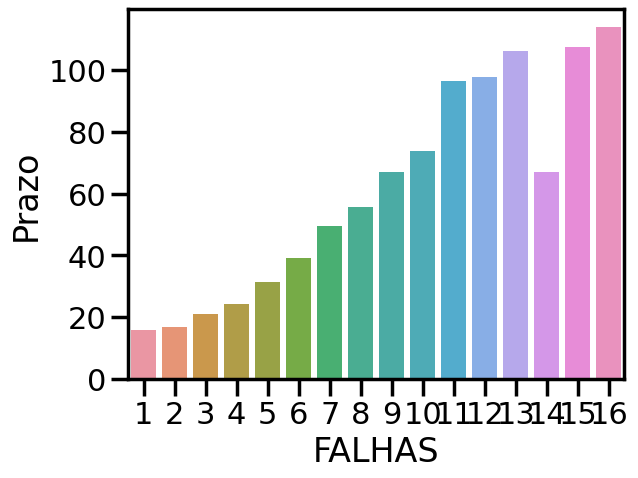

In [65]:
sns.set_context('poster', font_scale = 1)
sns.barplot(x = dataframe['FALHAS'], y = dataframe['Prazo'], errorbar=None)


Essas duas features se mostrarm bastante relacionadas, ou seja, provavelmente quanto maior tempo, provavelmente mais  mais falhas.

Relação do tempo com meio:

<AxesSubplot: xlabel='Prazo', ylabel='MEIO'>

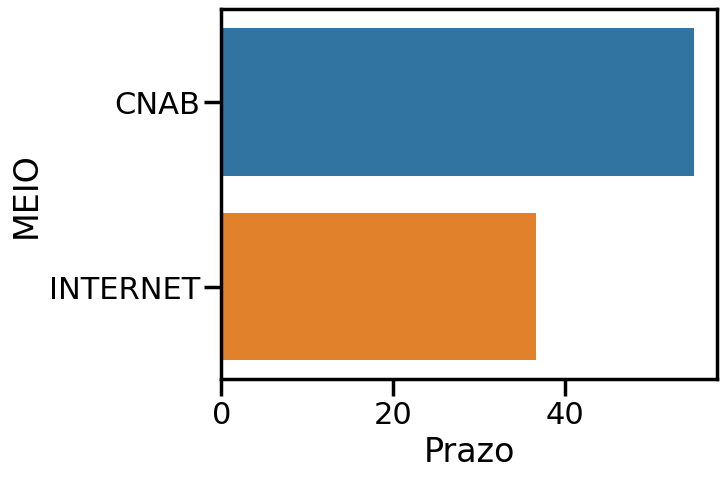

In [66]:
sns.set_context('poster', font_scale = 1)
sns.barplot(x = dataframe['Prazo'], y = dataframe['MEIO'], errorbar=None)

O meio se mostra importante, sendo a internet com menos tempo e menos falhas o que reafirma o primeiro gráfico.


Relação do tempo com Status:


<AxesSubplot: xlabel='Prazo', ylabel='STATUS'>

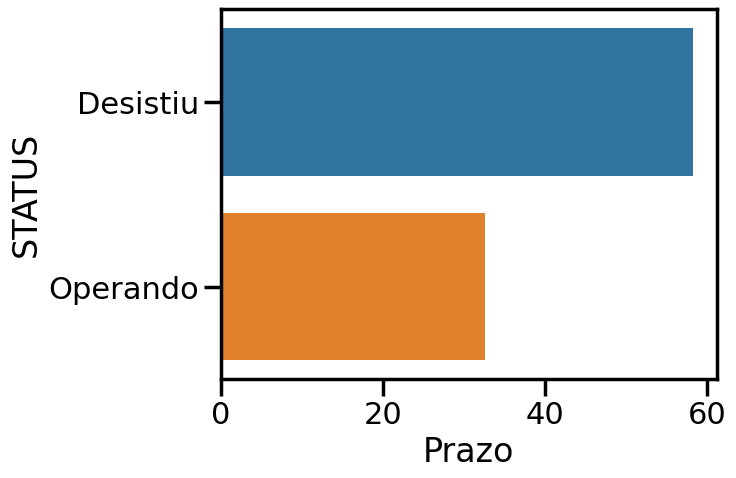

In [67]:
sns.set_context('poster', font_scale = 1)
sns.barplot(x = dataframe['Prazo'], y = dataframe['STATUS'], errorbar=None)


O tempo em relação ao status se mostra importante, dado que quanto maior o tempo consequentemente maior taxa de de desistência.

Conclusão:
O tempo é um valor determinante, e que para maior eficiência poderíamos realizar de forma mais ágil, para reduzir a taxa de desistência dos clientes.
